I - Charger et explorer le jeu de données afin de comprendre sa structure et ses caractéristiques principales.
    
     - Importer le dataset avec pandas

In [814]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/dataset-diabete.csv')

     - Inspecter la structure des données : colonnes, types, dimensions

In [815]:
df.describe()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,191.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,383.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,575.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [816]:
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,6,148,72,35,0,33.6,0.627,50
1,1,1,85,66,29,0,26.6,0.351,31
2,2,8,183,64,0,0,23.3,0.672,32
3,3,1,89,66,23,94,28.1,0.167,21
4,4,0,137,40,35,168,43.1,2.288,33


In [817]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


     - Vérifier les doublons et les valeurs manquantes

In [818]:
df.duplicated().sum()

np.int64(0)

In [819]:
df[df.duplicated()]

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age


In [820]:
df = df.replace(0, np.nan)  
df.isnull().sum()
df

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,NaN,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1.0,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31
2,2.0,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32
3,3.0,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,4.0,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...,...
763,763.0,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63
764,764.0,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27
765,765.0,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30
766,766.0,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47


     - Utilise KNN pour remplacer les valeur null
    

In [821]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)  

df_filled = imputer.fit_transform(df)

df = pd.DataFrame(df_filled, columns=df.columns)

     - Analyser la distribution des variables numériques (histogrammes, boxplots).

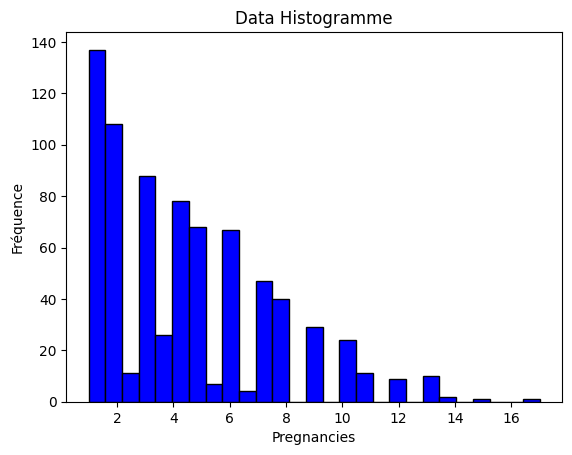

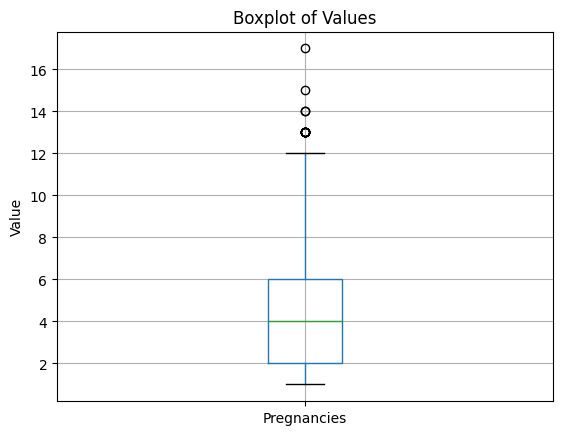

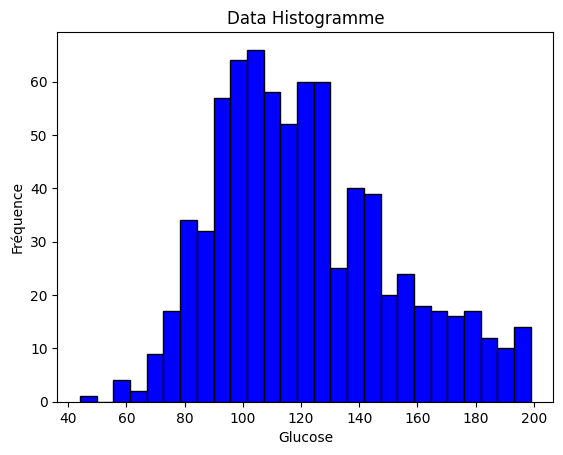

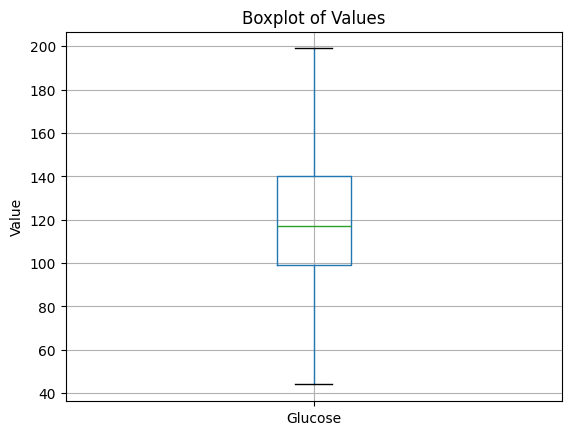

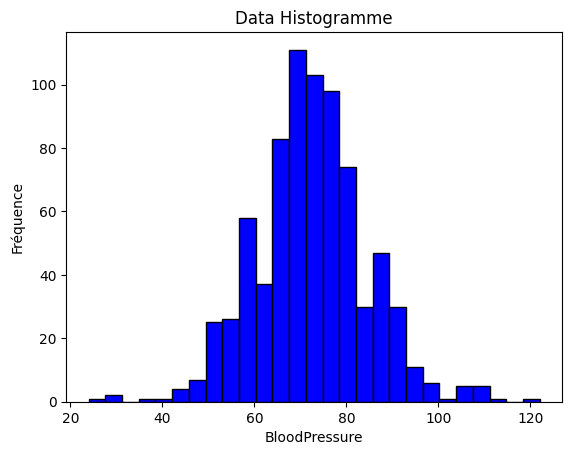

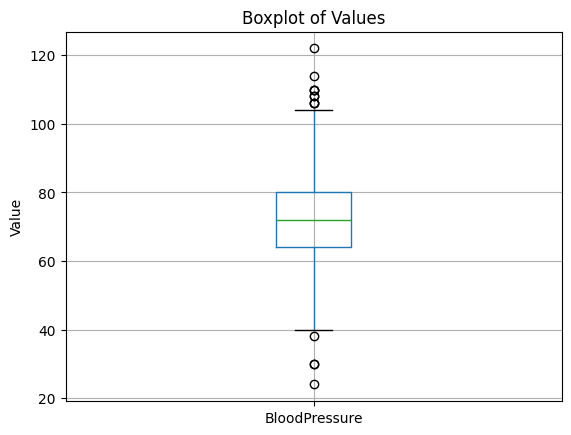

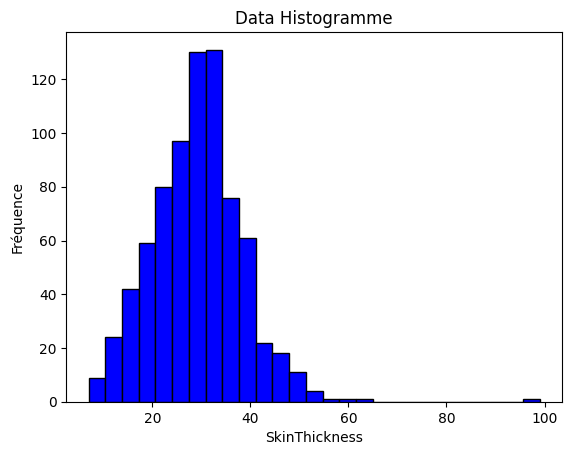

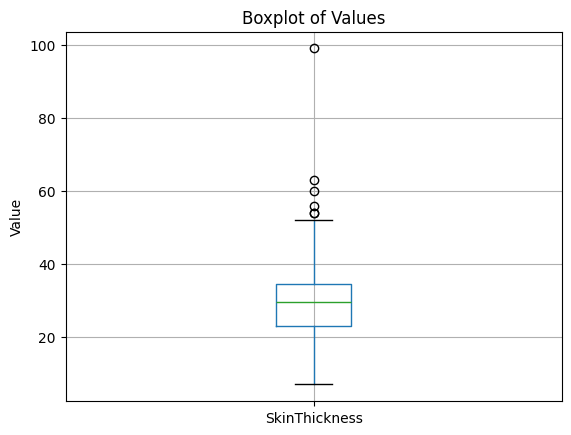

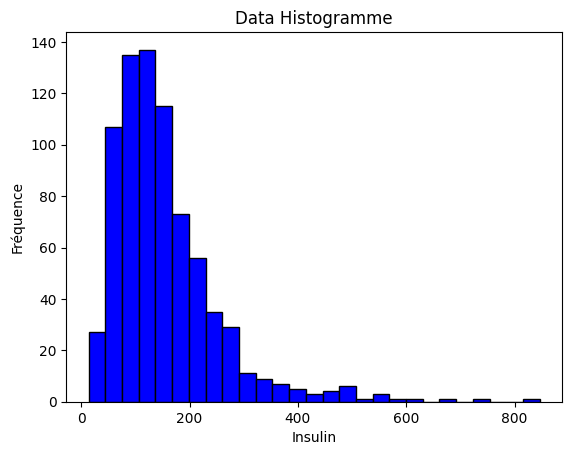

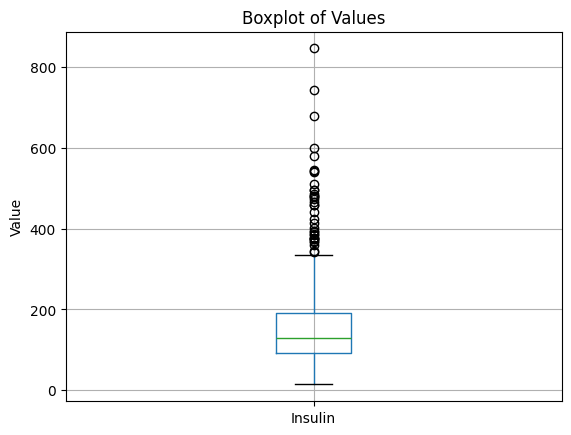

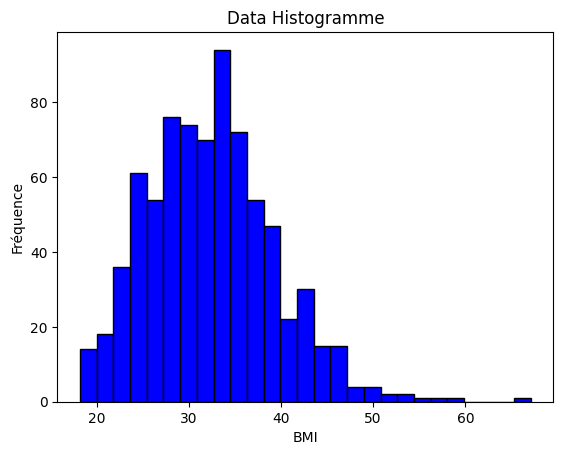

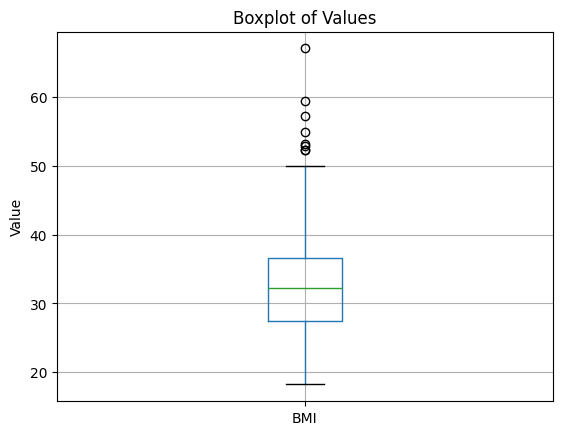

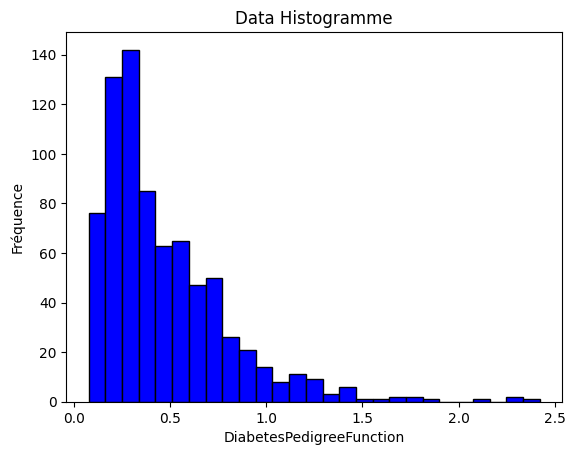

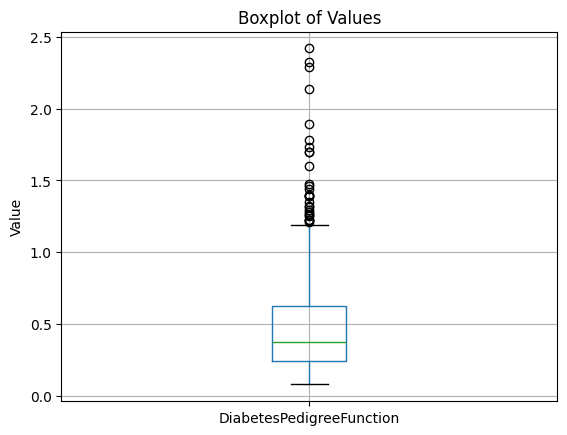

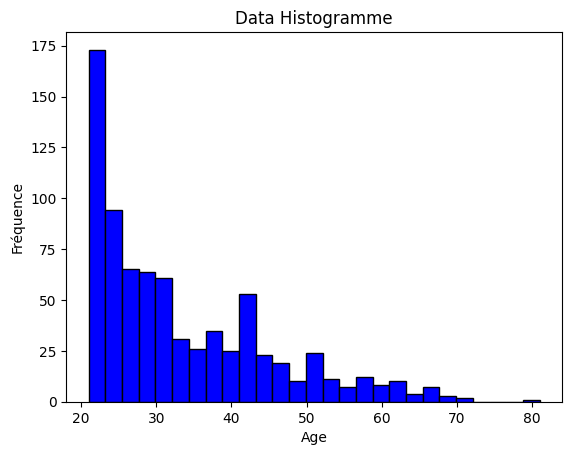

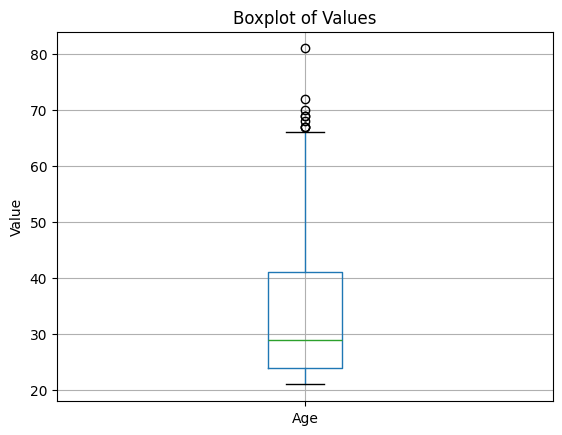

In [822]:
import matplotlib.pyplot as plt
import math

df = df.drop(columns =["Unnamed: 0" ])

for i in df.columns :

    plt.hist(df[i], bins=int(math.sqrt(df.shape[0])), color='blue', edgecolor='black')
    plt.title("Data Histogramme")
    plt.xlabel(i)
    plt.ylabel("Fréquence")
    plt.show()

    df.boxplot(column=i)
    plt.title("Boxplot of Values")
    plt.ylabel("Value")
    plt.show()


    - Supprimer les valeurs aberrantes

In [823]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,94.4,26.6,0.351,31.0
2,8.0,183.0,64.0,29.6,375.8,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,7.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


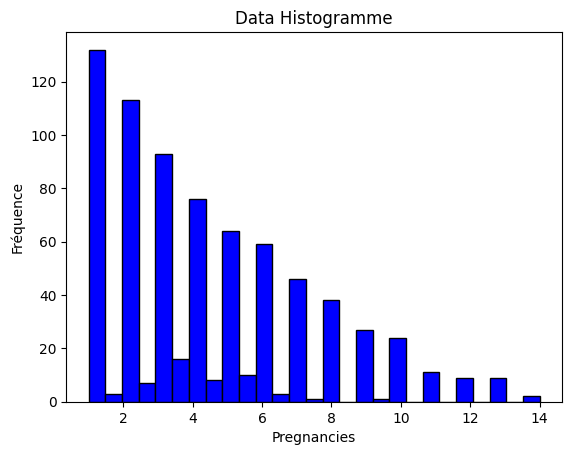

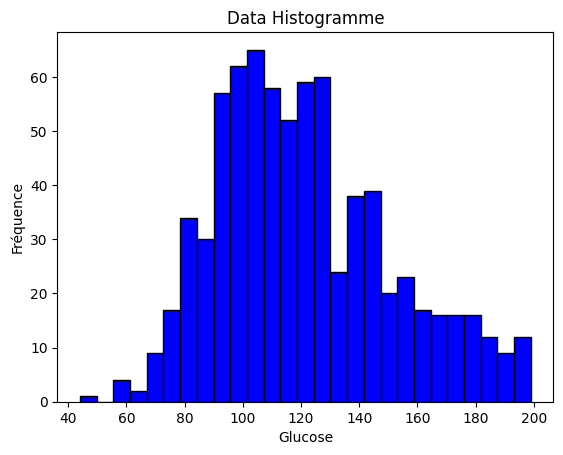

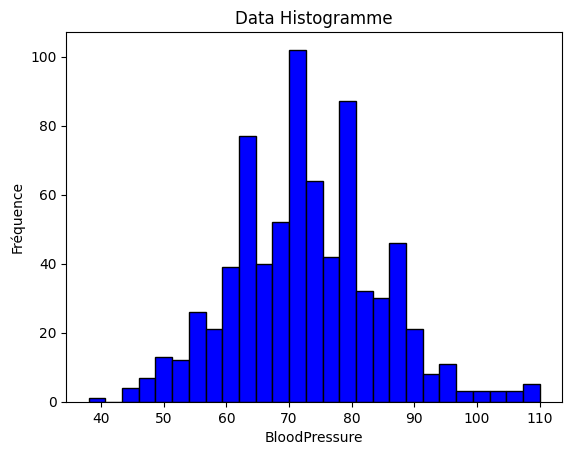

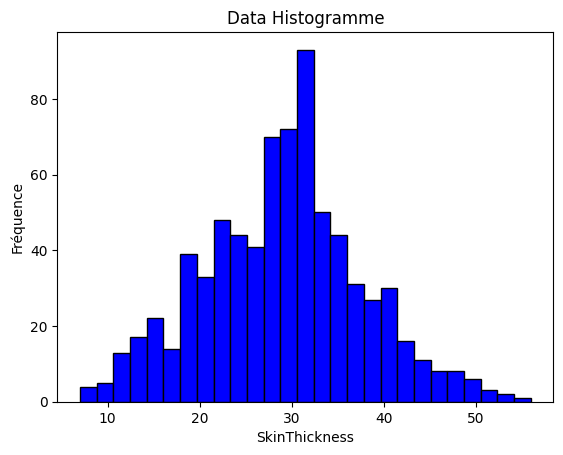

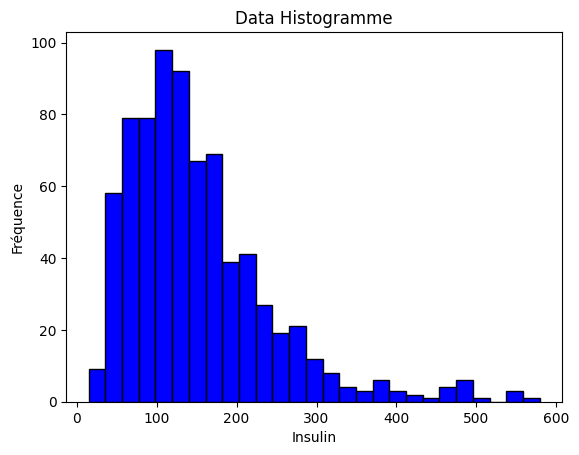

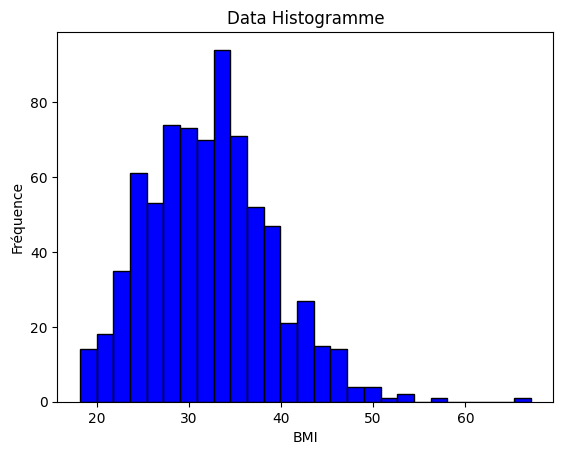

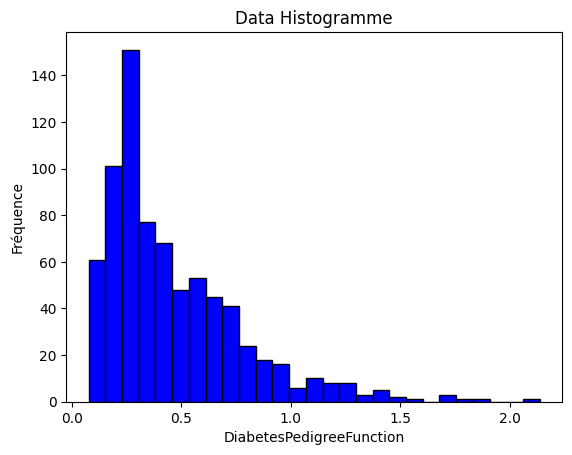

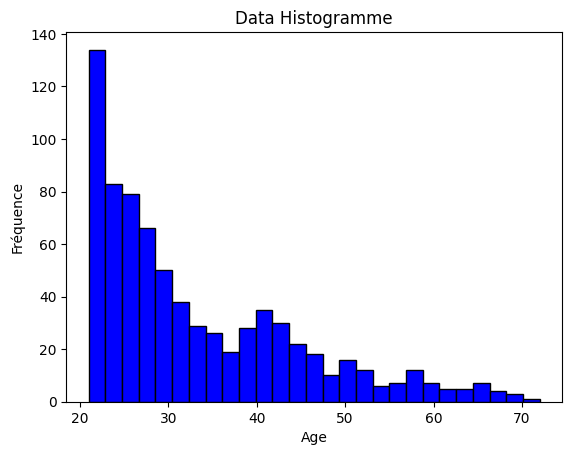

In [ ]:
df_no_outliers = df.copy()

#Pregnancies

Q1 = df_no_outliers["Pregnancies"].quantile(0.25)
Q3 = df_no_outliers["Pregnancies"].quantile(0.75)
IQR = Q3 - Q1
Pregnancies_upper_band = Q3 + 2 * IQR
df_no_outliers = df_no_outliers[(df_no_outliers["Pregnancies"] <= Pregnancies_upper_band)]

#BloodPressure






Q1 = df_no_outliers["SkinThickness"].quantile(0.25)
Q3 = df_no_outliers["SkinThickness"].quantile(0.75)
IQR = Q3 - Q1
SkinThickness_upper_band = Q3 + 2 * IQR

df_no_outliers = df_no_outliers[(df_no_outliers["SkinThickness"] <= SkinThickness_upper_band)]


Q1 = df_no_outliers["Insulin"].quantile(0.25)
Q3 = df_no_outliers["Insulin"].quantile(0.75)
IQR = Q3 - Q1
Insulin_upper_band = Q3 + 4 * IQR

df_no_outliers = df_no_outliers[(df_no_outliers["Insulin"] <= Insulin_upper_band)]

Q1 = df_no_outliers["DiabetesPedigreeFunction"].quantile(0.25)
Q3 = df_no_outliers["DiabetesPedigreeFunction"].quantile(0.75)
IQR = Q3 - Q1
DiabetesPedigreeFunction_upper_band = Q3 + 4 * IQR

df_no_outliers = df_no_outliers[(df_no_outliers["DiabetesPedigreeFunction"] <= DiabetesPedigreeFunction_upper_band)]

Q1 = df_no_outliers["Age"].quantile(0.25)
Q3 = df_no_outliers["Age"].quantile(0.75)
IQR = Q3 - Q1
Age_upper_band = Q3 + 2 * IQR

df_no_outliers = df_no_outliers[(df_no_outliers["Age"] <= Age_upper_band)]


for i in df_no_outliers.columns:
        plt.hist(df_no_outliers[i], bins=int(math.sqrt(df_no_outliers.shape[0])), color='blue', edgecolor='black')
        plt.title("Data Histogramme")
        plt.xlabel(i)
        plt.ylabel("Fréquence")
        plt.show()




     - Standardiser les variables numériques

In [825]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df_scaled = df_no_outliers.copy()
df_scaled = scaler.fit_transform(df_no_outliers)
df_scaled = pd.DataFrame(df_scaled, columns=df_no_outliers.columns, index=df_no_outliers.index)


     - Étudier les corrélations et relations entre variables (Matrice de corrélation , heatmap) et calculer la varience.

In [826]:
df_scaled.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.165145,0.278709,0.181704,0.139500,0.131694,0.004914,0.549420
Glucose,0.165145,1.000000,0.239976,0.233782,0.648363,0.231779,0.111376,0.258925
BloodPressure,0.278709,0.239976,1.000000,0.260456,0.159689,0.344403,0.023040,0.353612
SkinThickness,0.181704,0.233782,0.260456,1.000000,0.269310,0.594024,0.059242,0.169443
Insulin,0.139500,0.648363,0.159689,0.269310,1.000000,0.281785,0.102401,0.192318
BMI,0.131694,0.231779,0.344403,0.594024,0.281785,1.000000,0.114200,0.043682
DiabetesPedigreeFunction,0.004914,0.111376,0.023040,0.059242,0.102401,0.114200,1.000000,0.042899
Age,0.549420,0.258925,0.353612,0.169443,0.192318,0.043682,0.042899,1.000000


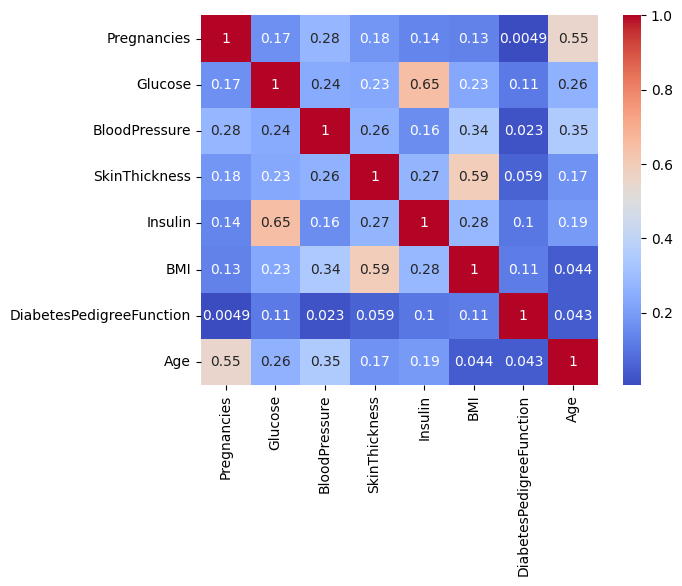

In [827]:
import seaborn as sns

sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.show()

In [828]:
df_scaled.var().sort_values()

SkinThickness               1.001332
Age                         1.001332
DiabetesPedigreeFunction    1.001332
Pregnancies                 1.001332
BMI                         1.001332
Glucose                     1.001332
Insulin                     1.001332
BloodPressure               1.001332
dtype: float64

In [829]:
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.533381,0.888311,-0.038749,0.692473,0.194278,0.196190,0.522496,1.457450
1,-1.153341,-1.201417,-0.553270,0.000920,-0.632280,-0.845154,-0.364066,-0.181077
2,1.208070,2.049270,-0.724778,0.070075,2.485593,-1.336073,0.667044,-0.094839
3,-1.153341,-1.068736,-0.553270,-0.690633,-0.636712,-0.622009,-0.955107,-1.043460
5,0.196037,-0.173138,0.132758,0.784680,0.028080,-0.993917,-0.845893,-0.267316


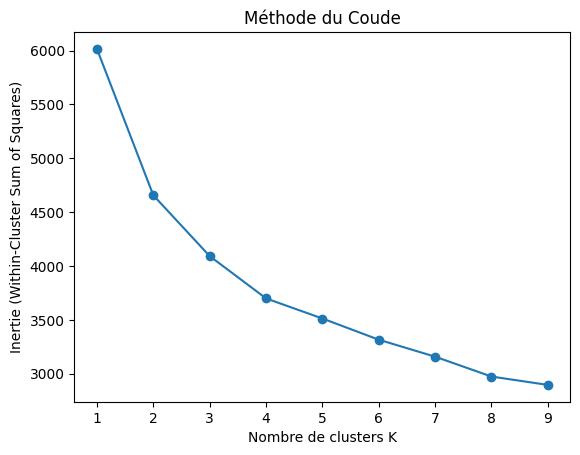

In [830]:
from sklearn.cluster import KMeans


inertias = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(K_range, inertias, marker='o')
plt.title("Méthode du Coude")
plt.xlabel("Nombre de clusters K")
plt.ylabel("Inertie (Within-Cluster Sum of Squares)")
plt.show()

In [831]:



from sklearn.metrics import silhouette_score


for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    score = silhouette_score(df_scaled, labels)
    print(f"K = {k}, Silhouette Score = {score}")


K = 2, Silhouette Score = 0.2169677608139012
K = 3, Silhouette Score = 0.1962115976925564
K = 4, Silhouette Score = 0.17292934170404867
K = 5, Silhouette Score = 0.13621546206723933
K = 6, Silhouette Score = 0.1364374662621721
K = 7, Silhouette Score = 0.14091907445555799
K = 8, Silhouette Score = 0.14512258082607787
K = 9, Silhouette Score = 0.1418813875750389


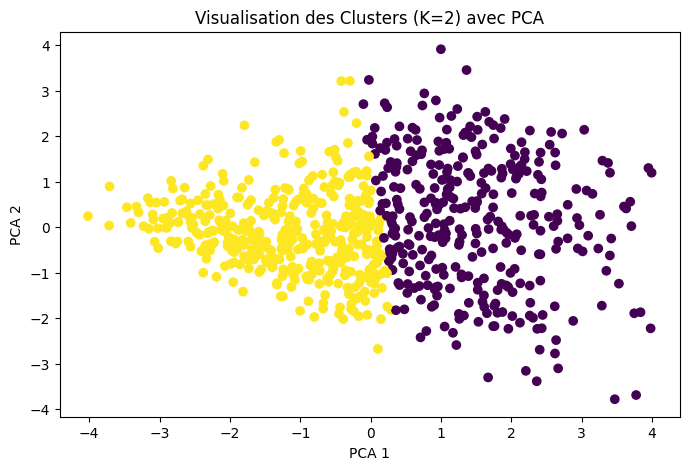

In [832]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd


kmeans = KMeans(n_clusters=2, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled.drop('Cluster', axis=1))

df_scaled['PCA1'] = pca_result[:, 0]
df_scaled['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 5))
plt.scatter(df_scaled['PCA1'], df_scaled['PCA2'], c=df_scaled['Cluster'])
plt.title("Visualisation des Clusters (K=2) avec PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [ ]:
explained_variance = pca.explained_variance_ratio_

print("Variance de PCA1 :", explained_variance[0] * 100, "%")
print("Variance de PCA2 :", explained_variance[1] * 100, "%")
print("Variance totale expliquée :", explained_variance.sum() * 100, "%")


Variance de PCA1 : 33.280187859157174 %
Variance de PCA2 : 17.01057540728263 %
Variance totale expliquée : 50.2907632664398 %


In [835]:
cluster_means = df_scaled.groupby('Cluster').mean()
cluster_means

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,PCA1,PCA2
Cluster,,,,,,,,,,
0,0.560050,0.603986,0.564916,0.542194,0.559194,0.474074,0.091098,0.604225,1.473857,0.164418
1,-0.459702,-0.495765,-0.463696,-0.445046,-0.458999,-0.389131,-0.074775,-0.495962,-1.209776,-0.134958


In [836]:
cluster_count = df_scaled['Cluster'].value_counts()
cluster_count

Cluster
1    413
0    339
Name: count, dtype: int64